In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
filename = 'yolov5n-SiLU-416_power-3.json'
with open(filename, 'rt') as fp:
    data = json.load(fp)

power_ts = np.array(data['power_ts'])
events = np.array(data['events'])
events = events -  power_ts[0, 0]
power_ts[:, 0] = power_ts[:, 0] - power_ts[0, 0]

Text(0, 0.5, 'Power (W)')

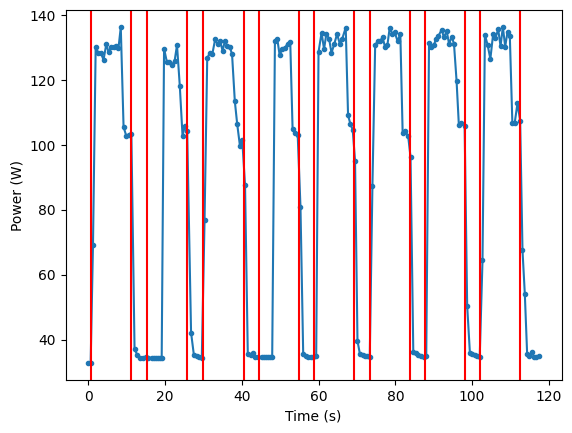

In [3]:
plt.plot(power_ts[:,0], power_ts[:, 1], '.-')
for event in events:
    plt.axvline(x=event, color='r', linestyle='-')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')

117.46038715459798
86.25332770803111
118.8942718895938
90.49016922468044
120.21944256116741
120.30348951117722
120.68123631764344
120.62377678767866


Text(0, 0.5, 'Power (W)')

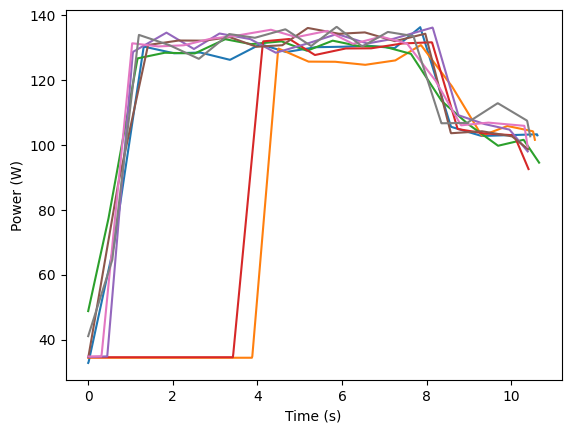

In [4]:
from scipy import interpolate
interpolator = interpolate.interp1d(power_ts[:, 0], power_ts[:, 1], kind='linear', fill_value='extrapolate')

# plot all runs on top of each other, each starting at the start time and ending at the end time
for start_event, stop_event in zip(events[::2], events[1::2]):
    ts_new = np.arange(start_event, stop_event, 0.01)
    power_int = interpolator(ts_new)
    mean_trapz = np.trapz(power_int) / (len(power_int) - 1)
    mean_regular = np.mean(power_int)
    print(mean_regular)
    plt.plot(ts_new - ts_new[0], power_int)
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')


Power consumption is usually pretty consistent, but in 2 out of 8 of the trials it ramped up ~4 seconds late.